In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
# Read the csv file and assign it to a variable as a dataframe
mpg_df = pd.read_csv(r'auto-mpg.csv')

In [3]:
# View the top five rows of the dataframe to ensure data has loaded correctly
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


2. Begin by prepping the data for modeling:
- Remove the car name column.
- The horsepower column values likely imported as a string data type. Replace any strings with the column mean.
- Create dummy variables for the origin column.

In [4]:
# Remove the car name column
mpg_df = mpg_df.drop(columns = 'car name')

In [5]:
# Verify that car name column has been dropped
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
# Get the statistics for each column in mpg_df
mpg_df.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


In [7]:
# Check the data types of entries in each column
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [8]:
# Find the ? in the horsepower column, replace it with the mean of the column, and convert data from string to a numeric object
mpg_df['horsepower'] = mpg_df['horsepower'].replace('?', np.mean(pd.to_numeric(mpg_df['horsepower'], errors = 'coerce')))

In [9]:
# Change the data type to float in the horsepower column and check the type of the horsepower column
mpg_df.horsepower = mpg_df.horsepower.astype(float)
mpg_df.horsepower.dtypes

dtype('float64')

In [10]:
# Check for NaN values and print them out next to each column name
mpg_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
# Create dummy variables for the origin column
pd.get_dummies(mpg_df.origin)

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
393,True,False,False
394,False,True,False
395,True,False,False
396,True,False,False


3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [12]:
matrix = mpg_df.corr()
matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


<Axes: >

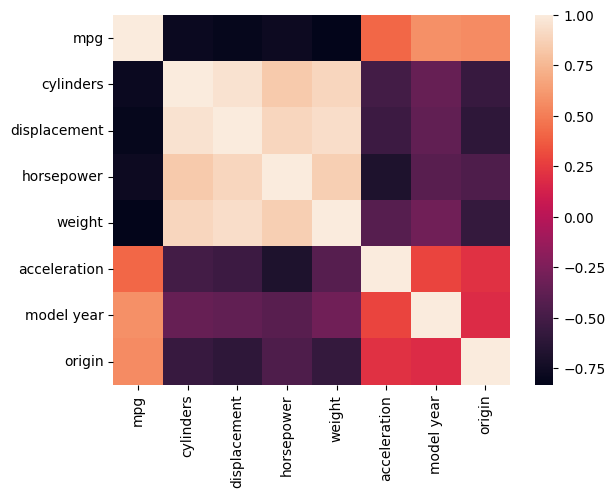

In [13]:
sns.heatmap(matrix)

The most highly correlated variables with mpg are displacement and weight, with cylinders and horsepower coming up behind.

4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

Text(0.5, 0.98, 'MPG vs Weight')

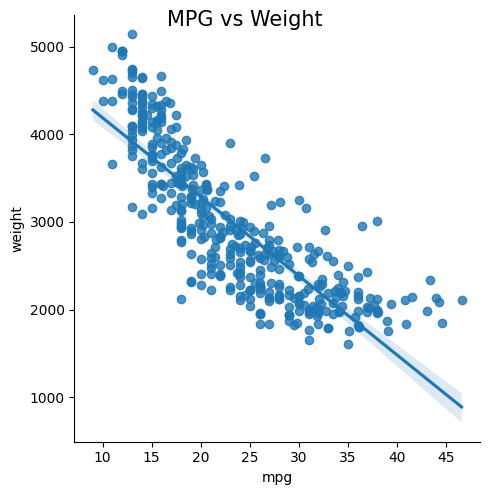

In [14]:
# Create a graph, creating a scatterplot and find the line of best fit
mpg_v_weight = sns.lmplot(data = mpg_df, x = 'mpg', y = 'weight', palette = 'Accent')
# Add a title to the graph
mpg_v_weight.fig.suptitle('MPG vs Weight', fontsize = 15, fontdict = {"weight": "bold"})

The correlation coefficient between mpg and weight was -0.831741. This implies a strong negative correlation between the two, as weight increases mpg decreases. We can see this based on the line of best fit - it follows a downward slope and the dots cluster relatively close to it.

5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [15]:
# output
y = mpg_df.mpg

# input
x = mpg_df.drop('mpg', axis = 1)

# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# print shapes of testing and training sets
print('Shape of Original Data: ', mpg_df.shape)
print('Shape of Input - Training Set: ', x_train.shape)
print('Shape of Output - Training Set: ', y_train.shape)
print('Shape of Input - Testing Set: ', x_test.shape)
print('Shape of Output - Testing Set: ', y_test.shape)

Shape of Original Data:  (398, 8)
Shape of Input - Training Set:  (318, 7)
Shape of Output - Training Set:  (318,)
Shape of Input - Testing Set:  (80, 7)
Shape of Output - Testing Set:  (80,)


6. Train an ordinary linear regression on the training data.

In [16]:
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [17]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [18]:
pd.DataFrame(lin_model.coef_, x.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.302913
displacement,0.017450
horsepower,-0.008027
weight,-0.006916
acceleration,0.140104
model year,0.764316
origin,1.562000


7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [19]:
# Assign the predictions done by the model to a variable called 'predictions'
predictions = lin_model.predict(x_test)

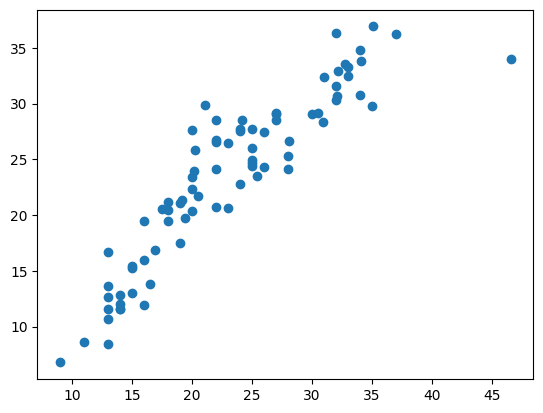

In [20]:
# View a scatter plot of the test results, we can see from the slope that the predicted values are fairly close to the actual values
plt.scatter(y_test, predictions)

(array([ 2.,  4., 14., 21., 21., 14.,  3.,  0.,  0.,  1.]),
 array([-8.76129949, -6.62801675, -4.49473402, -2.36145128, -0.22816854,
         1.90511419,  4.03839693,  6.17167967,  8.3049624 , 10.43824514,
        12.57152787]),
 <BarContainer object of 10 artists>)

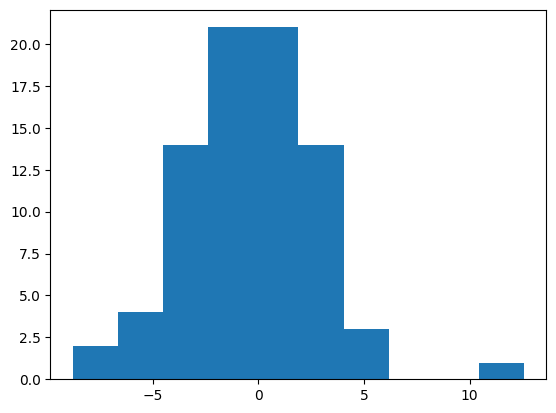

In [21]:
# Check a histogram of the test values minus the predictions, if it's a normal distribution that means our model is working
plt.hist(y_test - predictions)

In [22]:
# Calculate the mae, rmse, and r2 values
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

# Print the values
print('The Mean Absolute Error (MAE) is: ', mae)
print('The Root Mean Square Deviation is: ', rmse)
print('The Coefficient of Determination (R2) is: ', r2)

The Mean Absolute Error (MAE) is:  2.3768495108247842
The Root Mean Square Deviation is:  3.15131107370666
The Coefficient of Determination (R2) is:  0.8207167893025736


8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [23]:
# Train a model
model = BayesianRidge()
model.fit(x_train, y_train)

BayesianRidge()

In [24]:
bayes_prediction = model.predict(x_test)

In [25]:
# Evaluation of r2 score of the model against the test set
print(f'R2 Score of Test Set : {r2_score(y_test, bayes_prediction)}')

R2 Score of Test Set : 0.8233768255499966


In [26]:
bayes_mae = metrics.mean_absolute_error(y_test, predictions)
bayes_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('The Mean Absolute Error (MAE) is: ', mae)
print('The Root Mean Square Deviation is: ', rmse)

The Mean Absolute Error (MAE) is:  2.3768495108247842
The Root Mean Square Deviation is:  3.15131107370666
